In [28]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import scipy.io as sio

## Fourier Transform

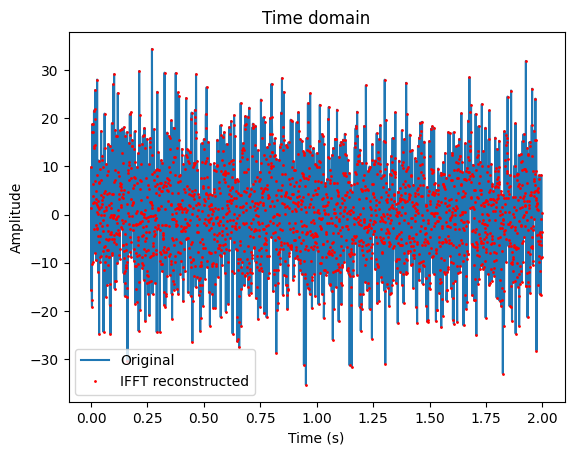

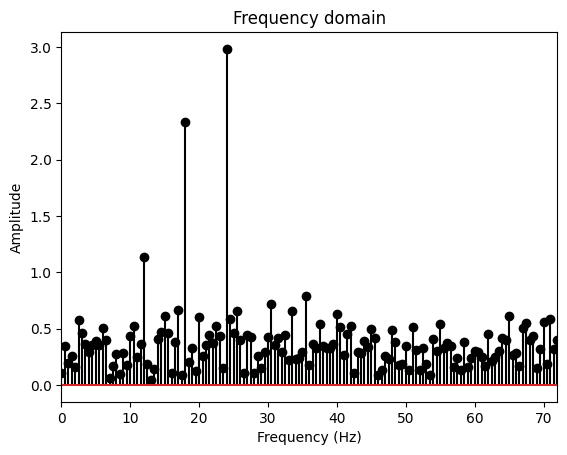

In [26]:
# Sampling frequency (number of samples per second)
sRate = 1234

# Total number of data points (sampling frequency * time duration = 2 seconds)
npnts = sRate * 2

# Time vector (each time point in seconds)
time = np.arange(0, npnts-1) / sRate

# Frequencies to include in the signal (base frequencies of the signal)
freq = [12, 18, 24]

# Create an empty signal initialized to zeros
signal = np.zeros(len(time))

# Add sinusoidal waves at 12 Hz, 18 Hz, and 24 Hz to the signal.
# Multiply each wave by (i+1) to differentiate their amplitudes.
for i in range(0, len(freq)):
    signal = signal + (i+1) * np.sin(2*np.pi*freq[i]*time)

# Add random noise to the signal (with noise level of 10 units)
signal = signal + 10 * np.random.randn(len(signal))

# Apply Fast Fourier Transform (FFT) to convert the signal to the frequency domain
signalX = scipy.fftpack.fft(signal)

# Compute the amplitude of the FFT (absolute value) and normalize it
signalAmp = 2 * abs(signalX) / npnts

# Create the frequency axis from 0 to sRate/2 (Nyquist frequency)
hz = np.linspace(0, sRate/2, int(np.floor(npnts/2)+1))

# Plot the original signal in the time domain
plt.plot(time, signal, label='Original')

# Apply Inverse FFT (IFFT) to reconstruct the signal back to the time domain and plot it
plt.plot(time, np.real(scipy.fftpack.ifft(signalX)), 'ro', markersize=1, label='IFFT reconstructed')

# Set labels and title for the time domain plot
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Time domain')
plt.legend()
plt.show()

# Plot the amplitude of the signal in the frequency domain
plt.stem(hz, signalAmp[0:len(hz)], 'k')

# Limit the x-axis of the frequency plot to focus on the relevant frequencies
plt.xlim([0, np.max(freq)*3])

# Set labels and title for the frequency domain plot
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Frequency domain')
plt.show()

## Welch's method

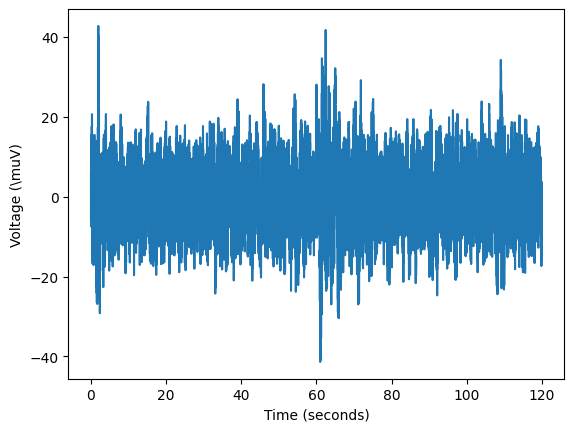

In [35]:
# Load the EEG dataset from a MATLAB file
data = sio.loadmat("EEGrestingState.mat")

# Extract EEG data and the sampling rate
eegData = data["eegdata"][0]  # EEG data (1D array)
sRate = data["srate"][0]  # Sampling rate (samples per second)

# Get the length of the EEG data (number of data points)
N = len(eegData)

# Create a time vector (time points in seconds) for plotting
timeVec = np.arange(0, N) / sRate

# Plot the EEG data against time
plt.plot(timeVec, eegData)
plt.xlabel('Time (seconds)')
plt.ylabel('Voltage (μV)')  # EEG data is usually in microvolts
plt.show()

# Create a Hann window for smoothing the signal
winsize = int(2 * sRate)  # Window size of 2 seconds (sample points for 2 seconds)
hannw = .5 - np.cos(2 * np.pi * np.linspace(0, 1, winsize)) / 2  # Hann window function

# Define the number of FFT points (affects frequency resolution)
nfft = sRate * 100  # More FFT points provide better frequency resolution

# Use the Welch method to compute the power spectral density (PSD)
f, welchpow = scipy.signal.welch(
    eegData,             # Input EEG data
    fs=sRate,            # Sampling rate
    window=hannw,        # Hann window
    nperseg=winsize,     # Length of each segment (window size)
    noverlap=winsize/4,  # Overlap between windows (25%)
    nfft=nfft            # Number of FFT points
)

# Plot the power spectral density against frequency
plt.plot(f, welchpow)
plt.xlim([0, 40])  # Limit x-axis to 0-40 Hz (EEG frequency range of interest)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.show()

## Spectrogram

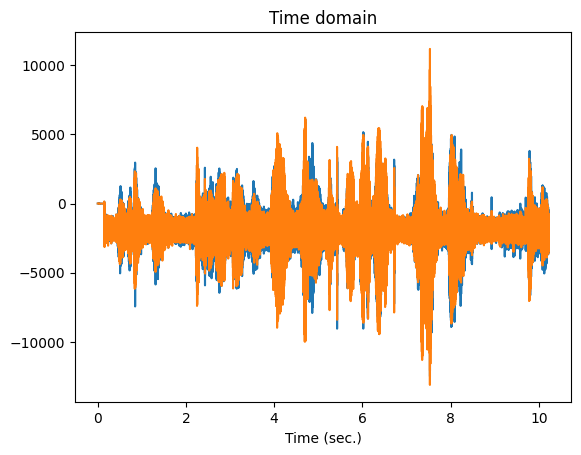

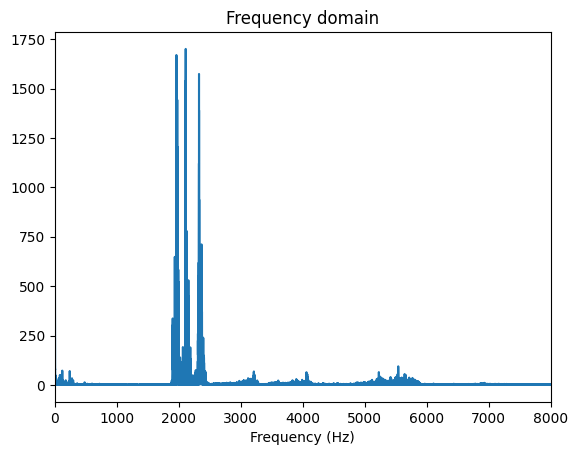

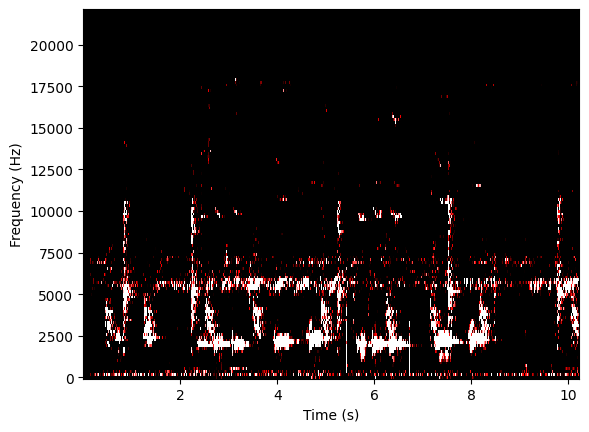

In [95]:
from matplotlib.colors import LinearSegmentedColormap

# Create a custom black-red-white color map
black_white_cmap = LinearSegmentedColormap.from_list("black_red", ["black", "red", "white"])

# Read the audio file
frameRate, data = sio.wavfile.read("XC403881.wav")

# Create a time vector based on the data sampling rate
n = len(data)
timevec = np.arange(0, n) / frameRate

# Plot the data from the two channels (time domain)
plt.plot(timevec, data)
plt.xlabel('Time (sec.)')
plt.title('Time domain')
plt.show()

# Compute the power spectrum (frequency domain)
hz = np.linspace(0, frameRate / 2, int(np.floor(n / 2) + 1))
bcpow = np.abs(scipy.fftpack.fft(scipy.signal.detrend(data[:, 0])) / n) ** 2

# Plot the frequency domain
plt.plot(hz, bcpow[0:len(hz)])
plt.xlabel('Frequency (Hz)')
plt.title('Frequency domain')
plt.xlim([0, 8000])
plt.show()

# Compute and plot the spectrogram
frex, time, pwr = scipy.signal.spectrogram(data[:, 0], frameRate)

plt.pcolormesh(time, frex, abs(pwr) ** 0.5, cmap=black_white_cmap, vmin=5, vmax=10)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()